# Modeling and Simulation in Python

David Tarazi

HIV model

10/15/18

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [4]:
init = State(R = 200, L = 0, E = 0, V = 100)
system = System(gamma = 1.36, tau = .2, mu = .00136, beta = .00027, delta = .33, alpha = .036, rho = .1, sigma = 2, pi = 100, t0 = 0, tEnd = 600, dt = 1/24)

,values
gamma,1.360000
tau,0.200000
mu,0.001360
beta,0.000270
delta,0.330000
alpha,0.036000
rho,0.100000
sigma,2.000000
pi,100.000000
t0,0.000000


# Update Function

In [5]:
def updateFunc(init, system):
    r, l, e, v = init
    
    deltaR = ((system.gamma * system.tau) - (system.mu * r) - (system.beta * r * v))*system.dt
    deltaL = ((system.rho * system.beta * r * v) - (system.mu * l) - (system.alpha * l))*system.dt
    deltaE = (((1 - system.rho) * system.beta * r * v) + (system.alpha * l) - (system.delta * e))*system.dt
    deltaV = ((system.pi * e) - (system.sigma * v))*system.dt
    
    r += deltaR 
    l += deltaL
    e += deltaE
    v += deltaV
    
    return State(R = r, L = l, E = e, V = v)

# Simulation

In [6]:
def runSimulation(system, state, updateFunc):
    frame = TimeFrame(columns = state.index)
    frame.row[system.t0] = state
    
    for i in linrange(system.t0, system.tEnd):
        frame.row[i+1] = updateFunc(frame.row[i], system)
    print(frame)
    return frame

In [10]:
def plotData(R, L, E):
    plot(R, label = "R")
    plot(L, label = "L")
    plot(E, label = "E")
    decorate(xlabel='Time (hours)',
             ylabel='Lymphocytes')
def plotVirons(virons):
    plot(virons, label = "V")
    decorate(xlabel='Time (hours)',
             ylabel='Virons')

             R          L         E        V
0.0        200          0         0      100
1.0    199.775     0.0225    0.2025  91.6667
2.0    199.569  0.0430668  0.385166  84.8715
3.0    199.378  0.0620547  0.551429  79.4038
4.0      199.2  0.0797684  0.704232  75.0844
5.0    199.032  0.0964707  0.846107  71.7617
6.0    198.872   0.112389  0.979232   69.307
7.0    198.717    0.12772   1.10549  67.6115
8.0    198.565   0.142636   1.22652  66.5834
9.0    198.417   0.157288   1.34373  66.1453
10.0   198.269   0.171808   1.45837  66.2321
11.0   198.122   0.186314   1.57154  66.7893
12.0   197.973    0.20091   1.68419  67.7716
13.0   197.822   0.215691   1.79718  69.1414
14.0   197.668   0.230743   1.91128  70.8679
15.0   197.511   0.246143   2.02718  72.9259
16.0   197.349   0.261964   2.14551  75.2953
17.0   197.182   0.278273   2.26685  77.9603
18.0   197.009   0.295134   2.39175  80.9088
19.0    196.83   0.312607   2.52069   84.132
20.0   196.644    0.33075   2.65417  87.6239
21.0    19

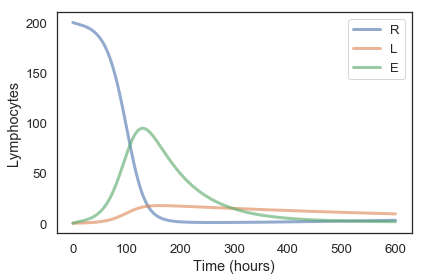

In [11]:
frame = runSimulation(system, init, updateFunc)
plotData(frame.R, frame.L, frame.E)

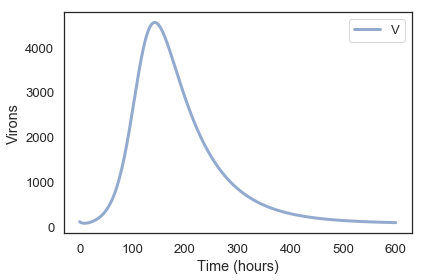

In [9]:
plotVirons(frame.V)